In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
path = Path(".")
if path.joinpath('../cf-graph-countyfair').is_dir():
    !ln -s ../cf-graph-countyfair/graph.json graph.json

elif not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

try:
    from conda_forge_tick.utils import load_graph
except:
    if not path.joinpath("cf-scripts").is_dir():
        !git clone https://github.com/regro/cf-scripts
        !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

Cloning into 'cf-graph-countyfair'...
remote: Enumerating objects: 116967, done.
remote: Counting objects: 100% (116967/116967), done.
remote: Compressing objects: 100% (46242/46242), done.
remote: Total 116967 (delta 83763), reused 90492 (delta 68408), pack-reused 0
Receiving objects: 100% (116967/116967), 48.64 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (83763/83763), done.
Updating files: 100% (131370/131370), done.


/home/cjwright/mc/lib/python3.8/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Callable
/home/cjwright/mc/lib/python3.8/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [4]:
gx = load_graph()

/home/cjwright/mc/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
[n for n in gx.nodes if "stub" in n]

['pthread-stubs',
 'xorg-libpthread-stubs',
 'c_compiler_stub',
 'cxx_compiler_stub',
 'fortran_compiler_stub',
 'm2w64_c_compiler_stub',
 'm2w64_cxx_compiler_stub',
 'm2w64_fortran_compiler_stub',
 'compatible_pin_stub',
 'subpackage_stub',
 'cdt_stub',
 'go_compiler_stub',
 'cgo_compiler_stub',
 'pyspark-stubs',
 'cuda_compiler_stub',
 'go14_compiler_stub',
 'go-cgo_compiler_stub',
 'r_clang_compiler_stub',
 'rust_compiler_stub',
 'clang_bootstrap_compiler_stub',
 'pandas-stubs']

In [6]:
langs = {
    "python": "Python",
    "c_compiler_stub": "C",
    "cxx_compiler_stub": "C++",
    "fortran_compiler_stub": "Fortran",
    "go_compiler_stub": "Go",
    "r-base": "R",
    "perl": "Perl",
}

In [7]:
double = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 2])
triple = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) >= 3])
others = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 0])

In [8]:
ns = [len(list(gx.successors(k))) for k in langs]

In [9]:
ns.extend([double, triple, others])
langs.update({"double": "Dual", "triple": "Polyglot", "other": "Other"})

In [10]:
print(ns)

[7786, 3226, 2090, 348, 128, 2484, 98, 1786, 1272, 768]


In [11]:
import pandas as pd

df = pd.DataFrame([ns], columns=langs.values(), index=["Number of Packages"]).T
df.sort_values(by="Number of Packages", inplace=True)

In [12]:
df

,Number of Packages
Perl,98
Go,128
Fortran,348
Other,768
Polyglot,1272
Dual,1786
C++,2090
R,2484
C,3226
Python,7786


/home/cjwright/mc/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


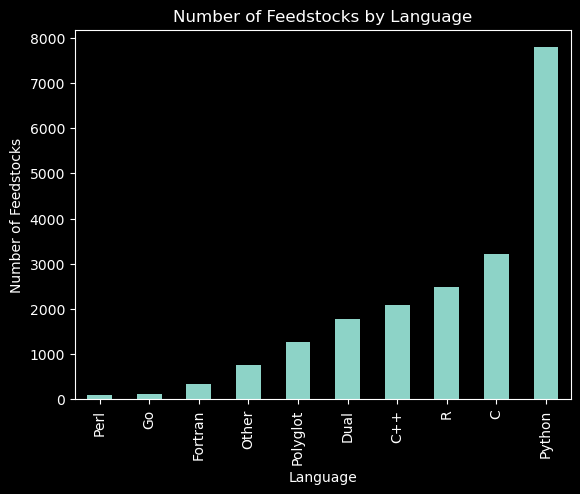

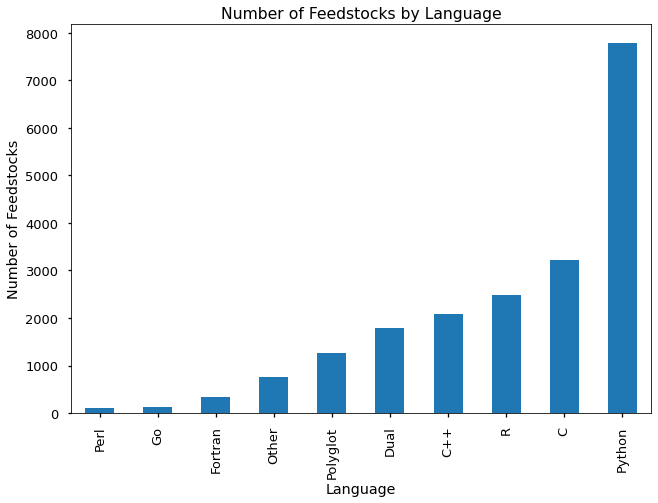

In [13]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df.plot.bar(legend=False, ax=ax)
        ax.set_title("Number of Feedstocks by Language")
        ax.set_xlabel("Language")
        ax.set_ylabel("Number of Feedstocks")
        fig.savefig(f"plots/n_packages_by_lang-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)